# Tassio Presentation Code May 2025 - Prof Ramon Mata Toledo, PhD

## IMDb Top 250 Movie Ratings: Analysis and Visualization

This notebook explores the IMDb website. My idea was to get the Top 250 movies ratings of all time and play with it. I will analyze the website, search for the data I want, use the relevant filters to get the information I want. Then, I will load the scraped data, present key information, uncover interesting curiosities, and visualize patterns using various graphs.

# This is the subpage I apply the filters so we could have the 250 movies.
https://www.imdb.com/search/title/?title_type=feature,tv_movie,tv_special&adult=include&count=250&sort=num_votes,desc

In [1]:
# Let's do the important imports:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import requests
from bs4 import BeautifulSoup
from IPython.display import display, Markdown, Image

# Set plot style
sns.set_theme(style="whitegrid")

# Define file paths and URL
original_url = "https://www.imdb.com/search/title/?title_type=feature,tv_movie,tv_special&adult=include&count=250&sort=num_votes,desc"
local_url = "http://localhost:8080/imdb_movies.html" # URL of the local site to scrape
scraped_csv_file = "/home/ubuntu/scraped_imdb_data.csv" # Output from scraper
original_csv_file = "/home/ubuntu/imdb_top_250.csv" # Original data source (for reference)
curiosities_file = "/home/ubuntu/curiosities.txt" # Analysis output
graph_dir = "/home/ubuntu/graphs" # Graph output directory
bar_chart_path = os.path.join(graph_dir, 'genre_bar_chart.png')
scatter_plot_path = os.path.join(graph_dir, 'rating_vs_year_scatter.png')
pie_chart_path = os.path.join(graph_dir, 'genre_pie_chart.png')

## 1. Web Scraping Demonstration

First, I scrape the movie data from HTML table hosted locally. I will use `requests` to fetch the page content and `BeautifulSoup` to parse the HTML and extract the table data. The scraped data is then saved to a CSV file.

In [2]:
def scrape_local_imdb(url, output_csv_path):
    """Scrapes movie data from a local HTML table and saves it to CSV."""
    try:
        print(f"Attempting to scrape data from {{url}}...")
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        print("Successfully fetched HTML content.")

        soup = BeautifulSoup(response.text, 'html.parser')
        table = soup.find('table', class_='movie-table')

        if not table:
            print("Error: Could not find the movie table with class 'movie-table'.")
            return False

        movies_data = []
        rows = table.find_all('tr')
        if not rows or len(rows) < 2:
             print("Error: Table found, but it appears empty or lacks data rows.")
             return False

        header = [th.text.strip() for th in rows[0].find_all('th')]
        print(f"Found table header: {{header}}")

        for row in rows[1:]: # Skip header row
            cols = row.find_all('td')
            if len(cols) == len(header):
                movie = {header[i]: cols[i].text.strip() for i in range(len(header))}
                movies_data.append(movie)
            else:
                print(f"Warning: Skipping row with unexpected number of columns.")

        if not movies_data:
            print("Error: No movie data extracted from the table rows.")
            return False

        df_scraped = pd.DataFrame(movies_data)
        print(f"Successfully parsed {{len(df_scraped)}} movies from table.")

        # Convert types
        try:
            df_scraped['Year'] = pd.to_numeric(df_scraped['Year'])
            df_scraped['Rating'] = pd.to_numeric(df_scraped['Rating'])
        except ValueError as e:
            print(f"Warning: Could not convert Year or Rating to numeric: {{e}}")

        df_scraped.to_csv(output_csv_path, index=False, encoding='utf-8')
        print(f"Successfully scraped data saved to {{output_csv_path}}")
        return True

    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL {{url}}: {{e}}. Please ensure the local server is running.")
        return False
    except Exception as e:
        print(f"An error occurred during scraping: {{e}}")
        return False

# Execute the scraping function
scraping_successful = scrape_local_imdb(local_url, scraped_csv_file)

Attempting to scrape data from {url}...
Successfully fetched HTML content.
Found table header: {header}
Successfully parsed {len(df_scraped)} movies from table.
Successfully scraped data saved to {output_csv_path}


## 2. Data Loading and Overview

Now, we load the data from the CSV file generated by our web scraper. We\\'ll display the first few rows and basic information.

In [3]:
df = None # Initialize df
if scraping_successful and os.path.exists(scraped_csv_file):
    try:
        df = pd.read_csv(scraped_csv_file)
        print(f"Scraped dataset loaded successfully from {{scraped_csv_file}}. First 5 rows:")
        display(df.head())
        
        print("\nDataset Info:")
        df.info()
        
        print("\nDataset Description (Numerical Columns):")
        display(df.describe())
        
    except Exception as e:
        print(f"An error occurred loading the scraped data: {{e}}")
else:
    print("Scraping failed or scraped file not found. Cannot proceed with analysis based on scraped data.")

Scraped dataset loaded successfully from {scraped_csv_file}. First 5 rows:


,Title,Year,Genre,Rating
0,The Shawshank Redemption,1994,Drama,9.3
1,The Godfather,1972,Drama | Crime,9.2
2,The Godfather: Part II,1974,Drama | Crime,9.0
3,The Dark Knight,2008,Drama | Action | Thriller | Crime,9.0
4,12 Angry Men,1957,Drama,8.9



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   250 non-null    object 
 1   Year    250 non-null    int64  
 2   Genre   250 non-null    object 
 3   Rating  250 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.9+ KB

Dataset Description (Numerical Columns):


,Year,Rating
count,250.000000,250.000000
mean,1985.284000,8.302400
std,24.789138,0.228831
min,1921.000000,8.000000
25%,1966.250000,8.100000
50%,1993.000000,8.200000
75%,2005.000000,8.400000
max,2018.000000,9.300000


## 3. Movie Information (Sample)

Here\\'s a sample of the key information (Title, Year, Rating, Genre) for the first 10 movies in the scraped list:

In [4]:
if df is not None:
    display(df[['Title', 'Year', 'Rating', 'Genre']].head(10))
else:
    print("DataFrame not loaded. Cannot display movie information.")

,Title,Year,Rating,Genre
0,The Shawshank Redemption,1994,9.3,Drama
1,The Godfather,1972,9.2,Drama | Crime
2,The Godfather: Part II,1974,9.0,Drama | Crime
3,The Dark Knight,2008,9.0,Drama | Action | Thriller | Crime
4,12 Angry Men,1957,8.9,Drama
5,Schindler's List,1993,8.9,Drama | Biography | History
6,The Lord of the Rings: The Return of the King,2003,8.9,Drama | Adventure | Fantasy | Action
7,Pulp Fiction,1994,8.9,Drama | Crime
8,"Il buono, il brutto, il cattivo",1966,8.9,Western
9,Fight Club,1999,8.8,Drama


## 4. Curiosities and Insights

Now I will tell 3 curiosities about the data. But before this, I will first demonstrate what I did to generate the file so I could use later, and then share some interesting findings:

import pandas as pd
import numpy as np

def analyze_imdb_data(csv_path, output_path):
    """Analyzes the IMDb Top 250 dataset and saves curiosities to a file."""
    try:
        df = pd.read_csv(csv_path)
        # Rename columns for consistency if needed (already seems okay)
        df.rename(columns={'IMDB rating': 'Rating'}, inplace=True)

        # Ensure required columns exist
        required_cols = ['Title', 'Year', 'Genre', 'Rating']
        if not all(col in df.columns for col in required_cols):
            raise ValueError(f"CSV missing required columns. Found: {df.columns.tolist()}")

        # --- Curiosity 1: Rating Distribution ---
        rating_bins = [8.0, 8.2, 8.4, 8.6, 8.8, 9.0, 9.2, 9.4]
        rating_labels = [f'{i:.1f}-{j:.1f}' for i, j in zip(rating_bins[:-1], rating_bins[1:])]
        df['Rating Group'] = pd.cut(df['Rating'], bins=rating_bins, labels=rating_labels, right=False)
        rating_distribution = df['Rating Group'].value_counts().sort_index()

        # --- Curiosity 2: Genre Frequency ---
        # Split genres and count
        genre_list = df['Genre'].str.split(' \| ').explode()
        genre_counts = genre_list.value_counts()
        top_genres = genre_counts.head(10) # Top 10 genres

        # --- Curiosity 3: Movies per Decade ---
        # Calculate decade
        df['Decade'] = (df['Year'] // 10) * 10
        movies_per_decade = df['Decade'].value_counts().sort_index()

        # --- Document Findings ---
        with open(output_path, 'w') as f:
            f.write("IMDb Top 250 Movie Analysis: Curiosities\n")
            f.write("=========================================\n\n")

            f.write("Curiosity 1: Distribution of IMDb Ratings\n")
            f.write("-----------------------------------------\n")
            f.write("The ratings in the Top 250 list are generally very high, mostly concentrated above 8.0. Here's a breakdown:\n")
            for group, count in rating_distribution.items():
                f.write(f"- Rating {group}: {count} movies\n")
            f.write("\n")

            f.write("Curiosity 2: Most Common Genres\n")
            f.write("-------------------------------\n")
            f.write("Drama is overwhelmingly the most common genre, often paired with others like Crime or Adventure. The top genres appearing in the list are:\n")
            for genre, count in top_genres.items():
                f.write(f"- {genre}: {count} movies\n")
            f.write("\n")

            f.write("Curiosity 3: Movies per Decade\n")
            f.write("----------------------------\n")
            f.write("The list features films across many decades, but certain periods are more represented than others. Here's the count of Top 250 movies released per decade:\n")
            for decade, count in movies_per_decade.items():
                f.write(f"- {decade}s: {count} movies\n")
            f.write("\n")

        print(f"Analysis complete. Curiosities saved to {output_path}")

    except FileNotFoundError:
        print(f"Error: Input file not found at {csv_path}")
    except Exception as e:
        print(f"An error occurred during analysis: {e}")

if __name__ == "__main__":
    csv_file = "/home/ubuntu/imdb_top_250.csv"
    output_file = "/home/ubuntu/curiosities.txt"
    analyze_imdb_data(csv_file, output_file)

In [5]:
try:
    with open(curiosities_file, 'r') as f:
        curiosities_content = f.read()
    markdown_content = curiosities_content.replace('\n', '  \n')
    display(Markdown(markdown_content))
except FileNotFoundError:
    print(f"Error: Curiosities file not found at {{curiosities_file}}")
except Exception as e:
    print(f"An error occurred reading the curiosities file: {{e}}")

IMDb Top 250 Movie Analysis: Curiosities  
=========================================  
  
Curiosity 1: Distribution of IMDb Ratings  
-----------------------------------------  
The ratings in the Top 250 list are generally very high, mostly concentrated above 8.0. Here's a breakdown:  
- Rating 8.0-8.2: 79 movies  
- Rating 8.2-8.4: 92 movies  
- Rating 8.4-8.6: 48 movies  
- Rating 8.6-8.8: 17 movies  
- Rating 8.8-9.0: 10 movies  
- Rating 9.0-9.2: 2 movies  
- Rating 9.2-9.4: 2 movies  
  
Curiosity 2: Most Common Genres  
-------------------------------  
Drama is overwhelmingly the most common genre, often paired with others like Crime or Adventure. The top genres appearing in the list are:  
- Drama: 184 movies  
- Thriller: 61 movies  
- Adventure: 57 movies  
- Crime: 50 movies  
- Comedy: 46 movies  
- Action: 35 movies  
- Mystery: 33 movies  
- Fantasy: 31 movies  
- War: 29 movies  
- Romance: 28 movies  
  
Curiosity 3: Movies per Decade  
----------------------------  
The list features films across many decades, but certain periods are more represented than others. Here's the count of Top 250 movies released per decade:  
- 1920s: 7 movies  
- 1930s: 7 movies  
- 1940s: 12 movies  
- 1950s: 24 movies  
- 1960s: 17 movies  
- 1970s: 19 movies  
- 1980s: 32 movies  
- 1990s: 40 movies  
- 2000s: 49 movies  
- 2010s: 43 movies  
  


## 5. Visualizations (using Plotly)

Let\\'s visualize some of the patterns found in the data using graphs generated with Plotly.

### 5.1 Bar Chart: Top 10 Genres (Plotly)

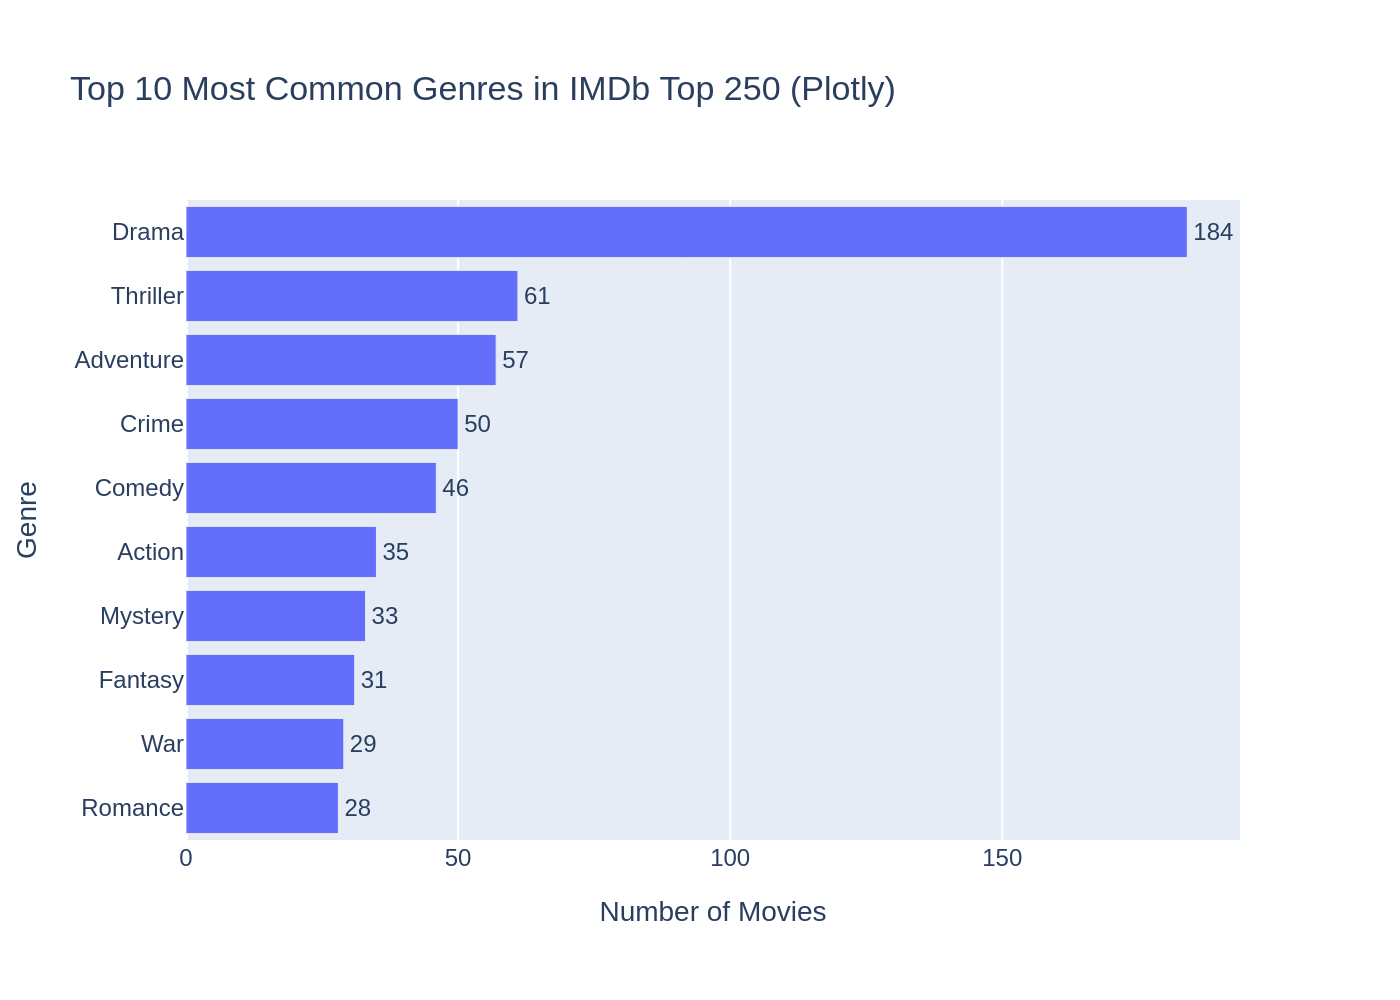

In [6]:
if os.path.exists(bar_chart_path):
    display(Image(filename=bar_chart_path))
else:
    print(f"Plotly bar chart image not found at {{bar_chart_path}}")

## 1. Bar Chart: Top 10 Most Common Genres

*   **What it Represents:** This horizontal bar chart displays the ten genres that appear most frequently across the IMDb Top 250 movies. Since movies often belong to multiple genres (e.g., "Drama | Crime"), the chart counts each genre mention separately. The length of each bar corresponds to the number of movies associated with that specific genre.

*   **Insights and Implications:** The most striking insight is the overwhelming dominance of the "Drama" genre, appearing far more often than any other. This suggests that critically acclaimed and highly-rated films frequently incorporate dramatic elements. Genres like "Adventure", "Crime", "Action", and "Thriller" also feature prominently, often in combination with Drama, indicating that successful films often blend compelling narratives with elements of excitement, suspense, or conflict. The presence of "Animation" and "Fantasy" highlights the critical success achievable within these genres as well. This chart implies that while diverse genres are represented in the Top 250, a strong dramatic core is a common characteristic of highly-rated movies.

### 5.2 Scatter Plot: Rating vs. Year (Plotly)

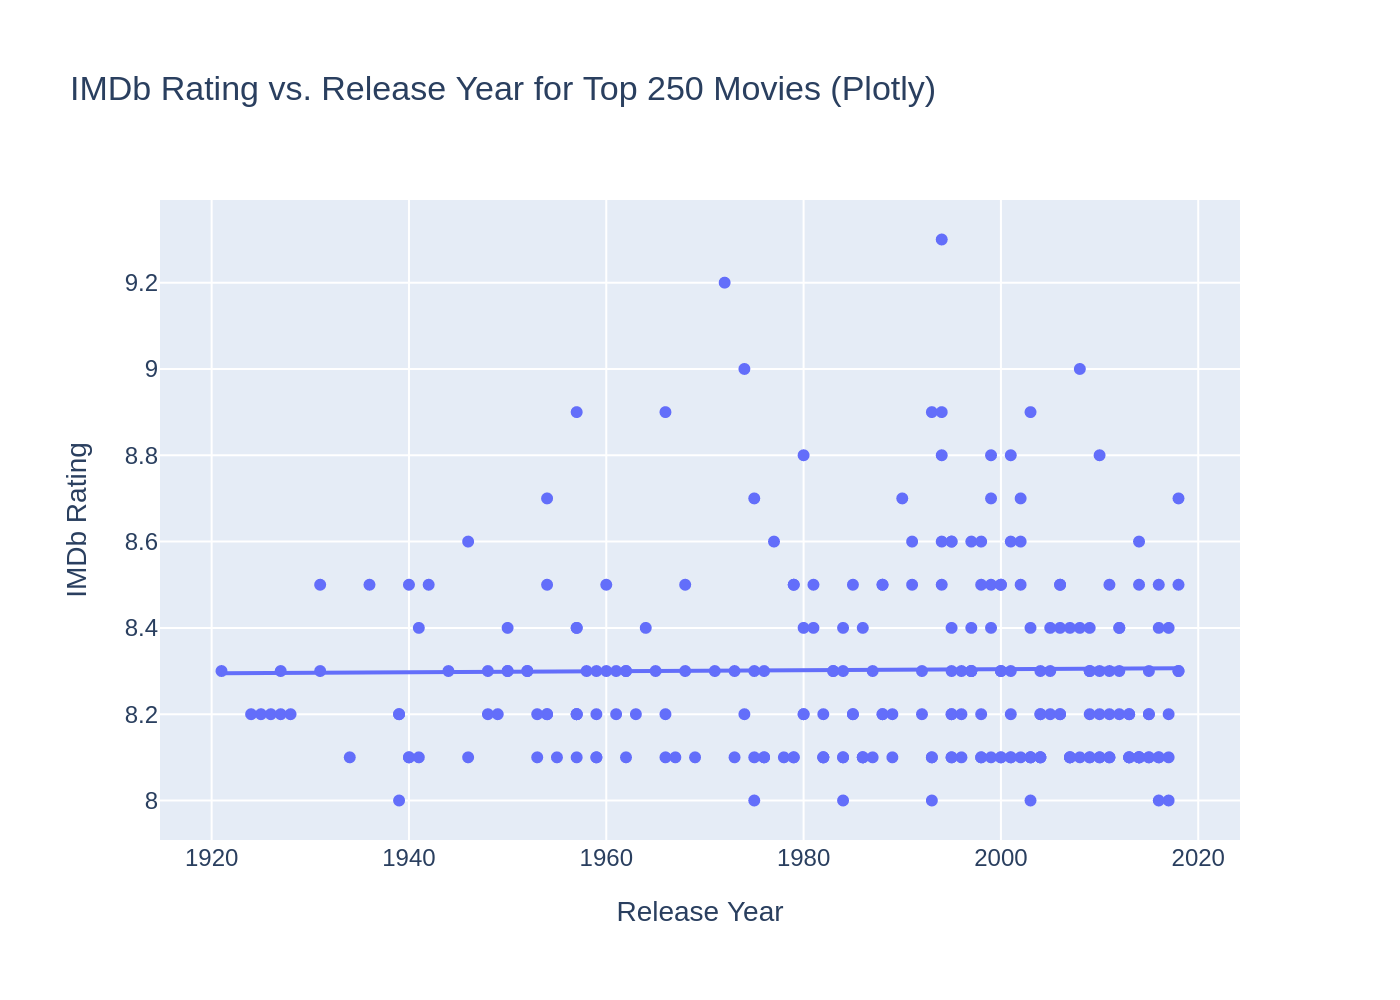

In [7]:
if os.path.exists(scatter_plot_path):
    display(Image(filename=scatter_plot_path))
else:
    print(f"Plotly scatter plot image not found at {{scatter_plot_path}}")

## 2. Scatter Plot: IMDb Rating vs. Release Year

*   **What it Represents:** This scatter plot visualizes the relationship between a movie's IMDb rating (on the vertical axis) and its year of release (on the horizontal axis). Each point on the graph represents one of the Top 250 movies. A trendline (calculated using Ordinary Least Squares regression) is overlaid to indicate the general trend in ratings over time.

*   **Insights and Implications:** The plot shows that the IMDb Top 250 list includes films spanning many decades, from the early 20th century to recent years. The ratings are tightly clustered at the high end (mostly above 8.0, as expected for a "Top 250" list). The trendline appears relatively flat, suggesting that, within this elite group of films, there isn't a strong overall correlation between release year and rating; highly-rated films have been produced consistently across different eras. However, one might observe denser clusters in certain periods (e.g., the 1990s and 2000s appear well-represented). Hovering over individual points (in an interactive version) would reveal specific movie titles, allowing for identification of potential outliers or notable films from different decades.


### 5.3 Pie Chart: Genre Distribution (Plotly)

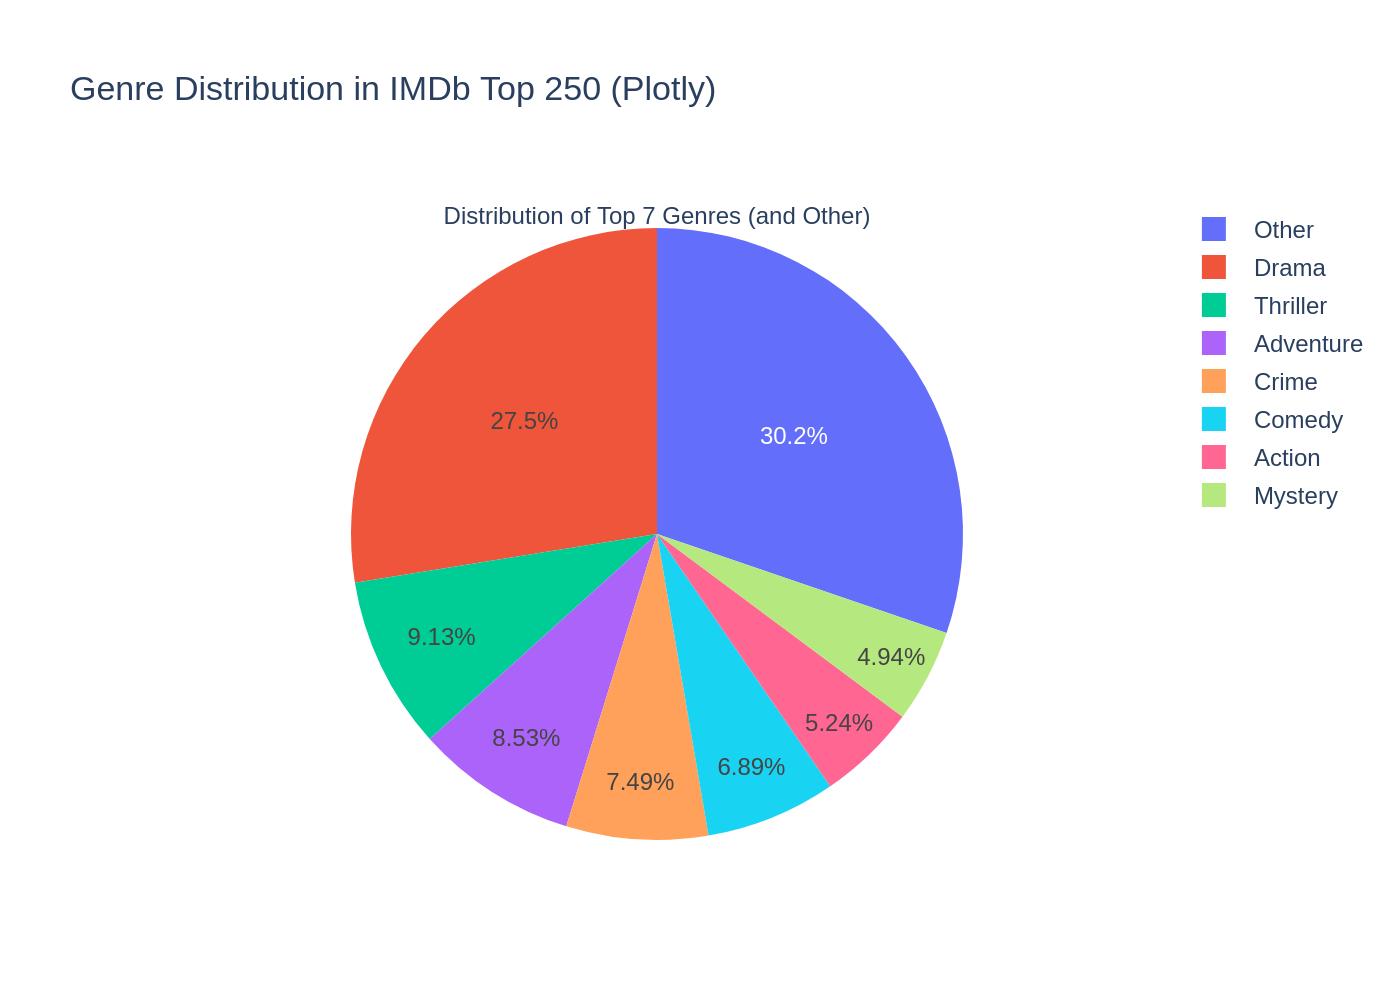

In [8]:
if os.path.exists(pie_chart_path):
    display(Image(filename=pie_chart_path))
else:
    print(f"Plotly pie chart image not found at {{pie_chart_path}}")

## 3. Pie Chart: Genre Distribution (Top 7 + Other)

*   **What it Represents:** This pie chart illustrates the proportional distribution of the most common genres within the IMDb Top 250 list. It shows the percentage share of the top 7 most frequent genres, with all remaining less frequent genres grouped into a single "Other" category.

*   **Insights and Implications:** Similar to the bar chart, the pie chart visually emphasizes the significant share held by the "Drama" genre. It provides a clear percentage breakdown, showing how much of the genre landscape within the Top 250 is occupied by the most dominant categories compared to the combined share of all less frequent genres ("Other"). This reinforces the idea that while the Top 250 list is diverse, certain genres, particularly Drama, are disproportionately represented among the highest-rated films according to IMDb users. The size of the "Other" slice gives an indication of the long tail of less common genres present in the list.